In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_csv("C:\\Users\\Admin\\Desktop\\Bykea\\data_copy.csv")

In [3]:
df.head()

,customer_id,acquired_by,acquired_date,transaction_time,product_code,parent_region_id,value,child_region_id,transaction_day,transaction_month,transaction_year,transaction_dayofweek,acquired_day,acquired_month,acquired_year,acquired_dayofweek,customer_total_value,acquired_by_encoded,product_code_encoded,parent_region_id_encoded
0,5f4c6ec3332a3a434908daeb7425d481,OFFLINE,2017-11-23 18:11:24.687000+00:00,2021-10-23 23:29:00.781,80,07B,175,8F1D5D51A8DA48731E42BBF353BFB7D8,23,10,2021,5,23,11,2017,3,825,0,4,0
1,45708d03d49d042719f0386dc37af61c,OFFLINE,2020-01-19 20:46:51.203000+00:00,2021-10-23 23:21:11.122,78,300,92,1BA53B5BBB76E9903A2CF8FF02C37293,23,10,2021,5,19,1,2020,6,3104,0,2,2
2,eb08a9964ddd08d3b2ec70d51bbefe5a,OFFLINE,2019-10-09 05:08:01.209000+00:00,2021-10-24 00:17:40.063,78,300,240,1BA53B5BBB76E9903A2CF8FF02C37293,24,10,2021,6,9,10,2019,2,1109,0,2,2
3,f887e577ad6ed3b78dd4fa4d405d9ae8,OFFLINE,2018-09-16 05:11:55.127000+00:00,2021-10-23 22:59:03.918,78,07B,234,729470E813F48EEAB42A800818FDC08E,23,10,2021,5,16,9,2018,6,2398,0,2,0
4,ab02b2539ad27589fdf17bc138e76ddb,ONLINE,2021-06-07 05:50:37.613000+00:00,2021-10-23 22:01:14.746,78,07B,103,3DCC8B4086B582DDB2E5481A5D44CAB4,23,10,2021,5,7,6,2021,0,969,1,2,0


In [4]:
df.shape

(1733984, 20)

In [5]:
# Assuming your DataFrame is named df
df_0 = df[df['acquired_by_encoded'] == 0]  # Subset of rows with class 0
df_1 = df[df['acquired_by_encoded'] == 1]  # Subset of rows with class 1

# Undersample the majority class (0) to match the quantity of the minority class (1)
df_0_balanced = df_0.sample(n=len(df_1), random_state=42)

# Concatenate the balanced subset of class 0 with the original class 1 DataFrame
balanced_df = pd.concat([df_0_balanced, df_1])

# Shuffle the rows of the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42)

# Print the balanced DataFrame
balanced_df.shape

(286560, 20)

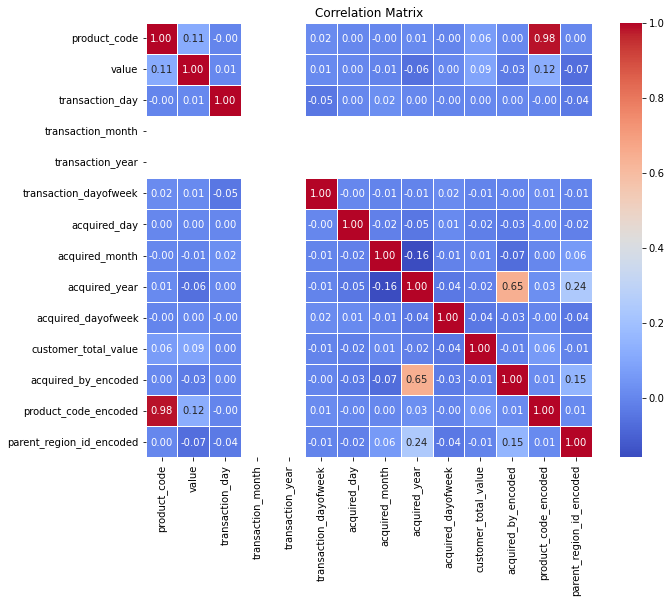

In [6]:
correlation_matrix = balanced_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [7]:
balanced_df.columns

Index(['customer_id', 'acquired_by', 'acquired_date', 'transaction_time',
       'product_code', 'parent_region_id', 'value', 'child_region_id',
       'transaction_day', 'transaction_month', 'transaction_year',
       'transaction_dayofweek', 'acquired_day', 'acquired_month',
       'acquired_year', 'acquired_dayofweek', 'customer_total_value',
       'acquired_by_encoded', 'product_code_encoded',
       'parent_region_id_encoded'],
      dtype='object')

In [8]:
# Drop irrelevant columns (if necessary) and separate the target variable
X = balanced_df.drop(columns=['transaction_dayofweek','value','customer_id', 'acquired_by', 'acquired_date', 'transaction_time', 'acquired_by_encoded', 'product_code', 'parent_region_id', 'child_region_id', 'customer_total_value', 'transaction_month', 'transaction_year', 'transaction_day', 'product_code_encoded'])
y = balanced_df['acquired_by_encoded']

In [9]:
X.columns

Index(['acquired_day', 'acquired_month', 'acquired_year', 'acquired_dayofweek',
       'parent_region_id_encoded'],
      dtype='object')

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for some models, including logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Evaluate the model's performance (e.g., accuracy)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")


Accuracy: 0.8023799553322166
